Original code with confusion matrix

In [ ]:
from keras.saving.saving_api import load_model
import numpy as np
import pandas as pd
import keras
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Activation

# Get input from user
steering_angle = float(-1.22425055779312)#float(input("Enter steering angle: "))
yaw_rate = float(5.21508528091659E-43) #float(input("Enter yaw rate: "))
vehicle_speed = float(-6.20545891352269E-45)#float(input("Enter vehicle speed: "))
time = float(3.15544362088405E-30)#float(input("Enter time: "))

# Create input array
input_data = np.array([[steering_angle, yaw_rate, vehicle_speed, time]])

# Define the ANN architecture
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Load weights (if previously trained)
#model.load_weights('model_weights.h5')

# Make prediction
print(input_data)
prediction = model.predict(input_data)

print( prediction)



##NEW CODE
import numpy as np
from sklearn.metrics import confusion_matrix

# Load the ANN model
# model_1 = load_model(model)

# Load the test set
# test_data = pd.read_csv('output00.csv')


# Predict the class labels for the test set
predicted_labels = model.predict(input_data)

# Create the confusion matrix
confusion_matrix = confusion_matrix(input_data.target, predicted_labels)

# Print the confusion matrix
print(confusion_matrix)



NEW code


In [ ]:
!pip install -q pyspark

!wget -q 'https://drive.google.com/uc?export=download&id=1wAdLRbT_YgWJ1XRl39JM-lKwJpewdwyM' -O 'Sample.txt'

from pyspark.sql import SparkSession

sqlContext = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [ ]:
import string
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

# Get input from user
# steering_angle = float(input("Enter steering angle: "))
# yaw_rate = float(input("Enter yaw rate: "))
# vehicle_speed = float(input("Enter vehicle speed: "))
# time = float(input("Enter time: "))
input_file = pd.read_csv('data001.csv')

# input_file['time'] = input_file['Time'].astype(float)
# input_file['xSpeed'] = input_file['xSpeed'].astype(float)
# input_file['yaw_rate']= input_file['YawRate'].astype(float)
# input_file['SteeringLeftResampled']= input_file['SteeringLeftResampled'].astype(float) # here also 2 options left and right  steering angle


time = input_file['Time']
vehicle_speed = input_file['xSpeed']
yaw_rate = input_file['YawRate']
steering_angle = input_file['SteeringLeftResampled']

print(input_file)


In [ ]:


model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')
# model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

predictions = []
i=0
while i <= len(input_file) :
  input_data = np.array([[steering_angle[i], yaw_rate[i], vehicle_speed[i], time[i]]])
  # print(i,input_data)

# #Make prediction
  prediction = model.predict(input_data, verbose=0)
  predictions.append(prediction)

  i+=1

predictions = [p[0][0] for p in predictions]
print(predictions)
df = pd.DataFrame(predictions, columns=['prediction'])
df.to_csv('predictions.csv', index=False)


# DF = sqlContext.createDataFrame(prediction).withColumnRenamed('_1','prediction')

In [ ]:

import string
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation




#Reading the input file which has Time,Vehicle_speed, yaw_rate, steering_angle as features.
input_file = pd.read_csv('data001.csv')

## Extracting featured data into different variables.
time = input_file['Time']
vehicle_speed = input_file['xSpeed']
yaw_rate = input_file['YawRate']
steering_angle = input_file['SteeringInputValuesResampled']
# instead of using just the left, calculate average of right and left


# print number of samples from .csv
print(len(input_file))

print(input_file)
# create a variable with the number of samples you want to input into our model, and run the loop same number of times as the number of samples desired






## Training the Model
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

##Running in loop as the input file has multiple records.
predictions = []
i=0
while i < len(input_file) :
  input_data = np.array([[steering_angle[i], yaw_rate[i], vehicle_speed[i], time[i]]])
  # print the values, so we can see what is going into our variable

  #Make prediction
  prediction = model.predict(input_data, verbose=0)
  predictions.append(prediction)

  i+=1


## generating an csv file of the predictions

predictions = [round(p[0][0]) for p in predictions]
print(predictions)
df = pd.DataFrame(predictions, columns=['prediction'])
df.to_csv('predictions.csv', index=False)


#print confusion matrix
#print training process




In [ ]:

import string
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
import csv


train_samples=np.array([])
#Reading the input file which has Time,Vehicle_speed, yaw_rate, steering_angle as features.
input = csv.reader('output09.csv')

with open('output09.csv') as csv_file:
    csv_reader = csv.reader(csv_file)

    # Loop through each row in the CSV file
    for row in csv_reader:
      train_samples=np.append(row[0],row[1],row[2],row[3])







# input_file = input.head(15000).tail(1000)
## Extracting featured data into different variables.

# while i in input_file:
#   # train_samples.append(input_file['Time'])
#   print(i)

# time = input_file['Time']
# vehicle_speed = input_file['xSpeed']
# yaw_rate = input_file['YawRate']
# steering_angle = input_file['SteeringInputValuesResampled']


# train_samples.append(time)
# train_samples.append(vehicle_speed)
# train_samples.append(yaw_rate)
# train_samples.append(steering_angle)


print(train_samples)

# print(type(steering_angle))
# j = 0
# evasive=0
# while j in steering_angle:
#   if round(steering_angle) > 0 :
#     evasive = 0
#   else:
#     evasive = 1

# print(steering_angle)
# print(evasive)
# instead of using just the left, calculate average of right and left


# print number of samples from .csv
# print(input_file.head(1000))

print("Actual input lenth ",len(input_file))
print(type(input_file))

# [[1,2,3,4,5],[1,2,3,4,5],
#  [1,2,3,4,5]
#  ]

In [ ]:

import string
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation





input_file = input.head(15000).tail(1000)
## Extracting featured data into different variables.

train_samples=np.array([])
while j in input_file:
  train_samples=np.append(k['']



In [ ]:
from numpy.core.multiarray import array


import string
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation


# train_samples = np.array([])
#Reading the input file which has Time,Vehicle_speed, yaw_rate, steering_angle as features.
input  = pd.read_csv('output09.csv')

df = input.head(15000).tail(1000)
df['evasive_driving'] = df['SteeringInputValuesResampled'].apply( lambda x: 1 if (x < 0 and x < -15) or (x>0 and x > 15) else 0)


print(len(input))

df.column= ['Time','xSpeed','YawRate','SteeringInputValuesResampled','evasive_driving']
df.to_csv('evasive.csv', index=None)
# print( df)
## Extracting featured data into different variables.

# while i in input_file:
#   # train_samples.append(input_file['Time'])
#   print(i)

# time = input_file['Time']
# vehicle_speed = input_file['xSpeed']
# yaw_rate = input_file['YawRate']
# steering_angle = input_file['SteeringInputValuesResampled']


# train_samples.append(time)
# train_samples.append(vehicle_speed)
# train_samples.append(yaw_rate)
# train_samples.append(steering_angle)




# print(type(steering_angle))
# j = 0
# evasive=0
# while j in steering_angle:
#   if round(steering_angle) > 0 :
#     evasive = 0
#   else:
#     evasive = 1

# print(steering_angle)
# print(evasive)

Actual that was working.

In [ ]:

import string
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from pandas.core import series
import pandas as pd


#Reading the input file which has Time,Vehicle_speed, yaw_rate, steering_angle as features.
input = pd.read_csv('output09.csv')
input_file = input.head(14000).tail(1000)
input_file = input_file.reset_index(drop=True)

## Extracting featured data into different variables.
time = input_file['Time']
vehicle_speed = input_file['xSpeed']
yaw_rate = input_file['YawRate']
steering_angle = input_file['SteeringInputValuesResampled']

# instead of using just the left, calculate average of right and left


# print number of samples from .csv
print('considering only = ',len(input_file))

# print(input_file)
# create a variable with the number of samples you want to input into our model, and run the loop same number of times as the number of samples desired






## Training the Model
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

##Running in loop as the input file has multiple records.
predictions = []
i=0
while i < len(input_file) :
  input_data = np.array([[steering_angle[i], yaw_rate[i], vehicle_speed[i], time[i]]])
  # print the values, so we can see what is going into our variable

  #Make prediction
  prediction = model.predict(input_data, verbose=0)
  prediction = round(prediction[0][0])
  predictions.append(prediction)

  i+=1





predict_series = pd.Series(predictions, name='prediction')



## generating an csv file of the predictions

### Adding Evasive column
input_file['evasive_driving'] = input_file['SteeringInputValuesResampled'].apply( lambda x: 1 if (x < 0 and x < -15) or (x>0 and x > 15) else 0)

# print(input_file['evasive_driving'])
#print confusion matrix


# Create confusion matrix

actual_labels = input_file['evasive_driving']

# Generating confusion matrix

predict_series = predict_series.apply(lambda x: 1 if x > 0 else 0)

conf_mat = confusion_matrix(actual_labels, predict_series)

print('Confusion Matrix:')
print(conf_mat)

sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



considering only =  1000
Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_144 (Dense)           (None, 64)                320       
                                                                 
 dense_145 (Dense)           (None, 32)                2080      
                                                                 
 dense_146 (Dense)           (None, 1)                 33        
                                                                 
Total params: 2,433
Trainable params: 2,433
Non-trainable params: 0
_________________________________________________________________


Confusion Matrix:
[[  2 129]
 [188 681]]


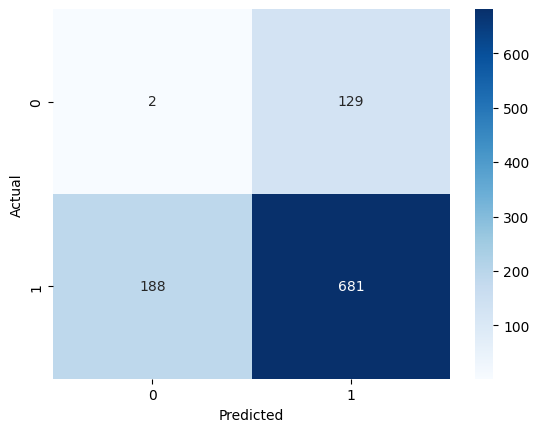

In [ ]:
print(len(input))